# Time Series Basics
According to <a href='https://en.wikipedia.org/wiki/Time_series'>wikipedia</a>, a time series is "a series of data points indexed in time order." The goal of time series analysis is to predict future values based on past behavior. 

This differs from other analyses that compare $x$ to $y$, since $x$ is not really a variable. For example, if I measure the boiling point of water with 1%, 3%, 5% and 7% salt solutions, I should be able to predict the boiling point at 4%. But with time series, we can't go back and "plug in" a new value of $x$, since we can never go back in time. For this reason, a time series with one $y$ variable is called <em>univariate</em>. 

By the end of this course you will understand the following code, and be able to create your own time series plots.

<div class="alert alert-info"><h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>by Rob J Hyndman and George Athanasopoulos</font><br>
<strong>
<a href='https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4.htm'>NIST/SEMATECH e-Handbook of Statistical Methods</a></strong>&nbsp;&nbsp;<font color=black>Introduction to Time Series Analysis</font></div>

In [9]:
# RUN THIS CELL TO DISPLAY THE PLOT
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Source: https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html
df = pd.read_csv('../Data/co2_mm_mlo.csv', encoding='utf8')
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [2]:
df.tail()

,year,month,decimal_date,average,interpolated
724,2018,7,2018.542,408.71,408.71
725,2018,8,2018.625,406.99,406.99
726,2018,9,2018.708,405.51,405.51
727,2018,10,2018.792,406.00,406.00
728,2018,11,2018.875,408.02,408.02


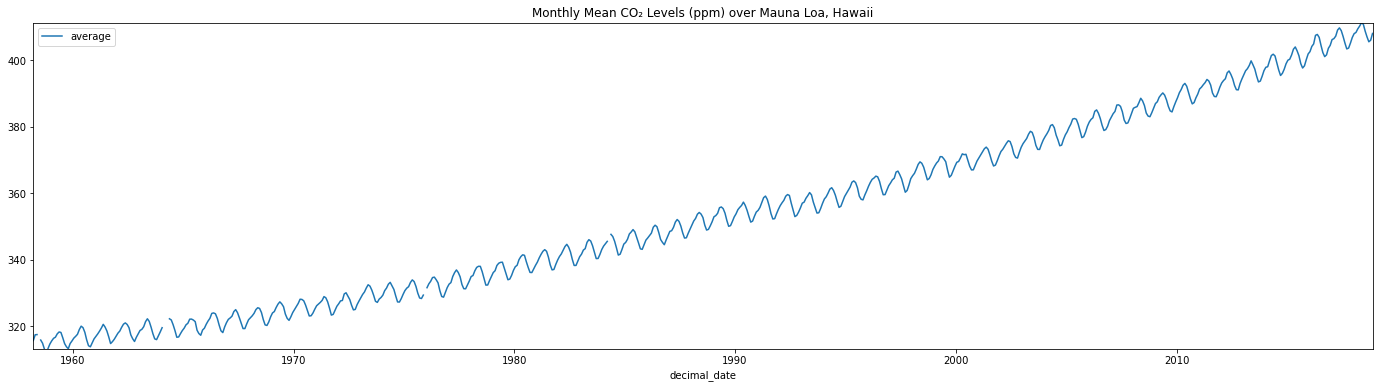

In [5]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
df.plot('decimal_date','average',figsize=(24,6),title=title).autoscale(axis='both',tight=True);

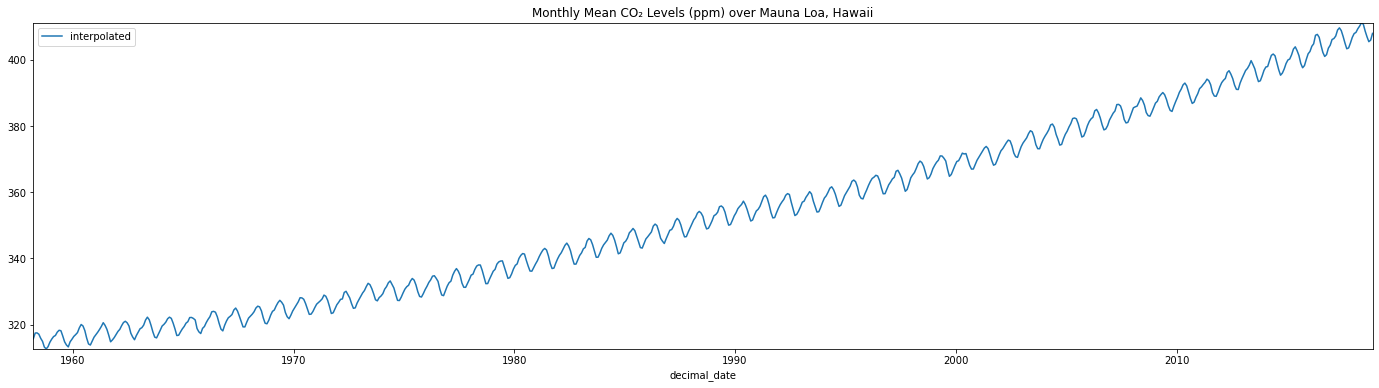

In [6]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
df.plot('decimal_date','interpolated',figsize=(24,6),title=title).autoscale(axis='both',tight=True);

The above plot clearly illustrates some of the fundamentals of time series analysis:
* **trend** - over the past 60 years there is a clear, non-linear upward trend in the levels of CO<sub>2</sub> in the atmosphere at Mauna Loa, Hawaii
* **seasonality** - within any given year there are cyclical patterns of rising and falling CO<sub>2</sub> levels
* **noise** - we also see random, non-systemic fluctuations in the data


Below is another example of time series data 

In [13]:
#  import candy production data 
df= pd.read_csv('https://raw.githubusercontent.com/zinduaschool/data-science-public/main/05-advanced-machine-learning/00.%20Resources/08.%20Time%20Series%20Analysis/candy_production.csv',
                index_col = 'observation_date',
                parse_dates=True)

df.head()

,IPG3113N
observation_date,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100


Text(0.5, 1.0, 'Candy Production')

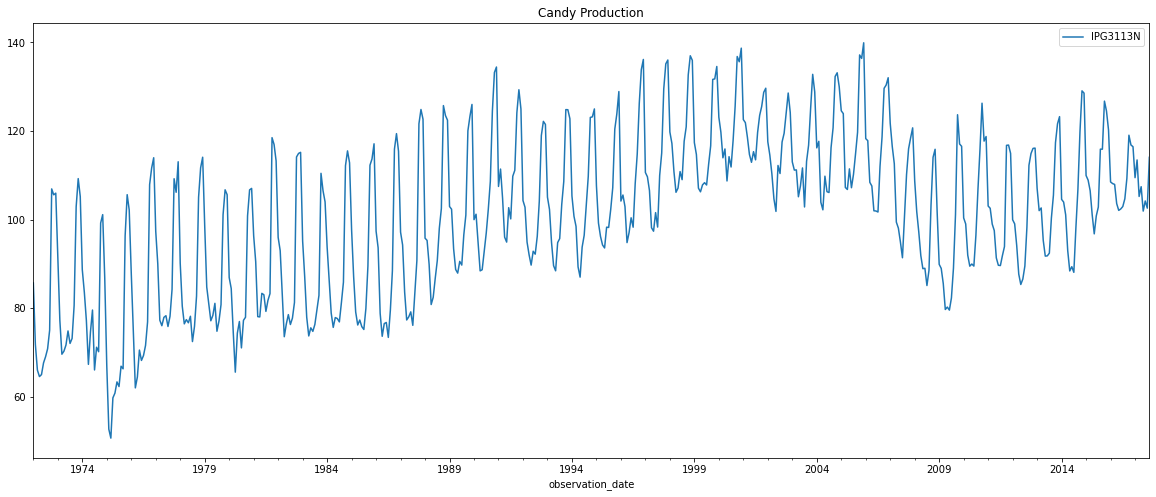

In [14]:
# Plot and show the time series on axis ax1
ax1 = df.plot(figsize=(20, 8))
ax1.set_title('Candy Production')

In time series, we split the data based on time 

(408, 1) (152, 1)


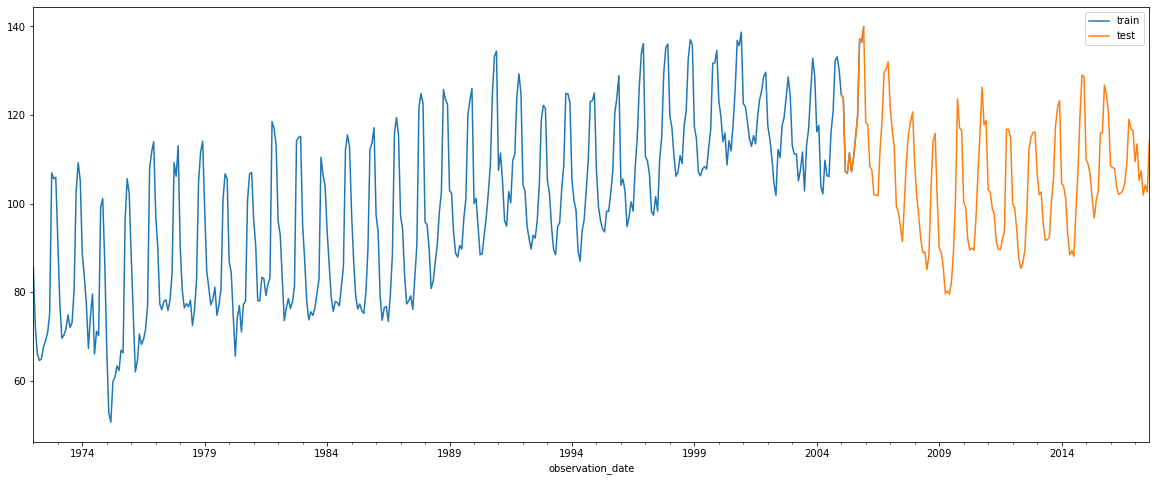

In [15]:
# split the data into train an test
train = df.loc[:'2005']
test = df.loc['2005':]

# plot this
fig,ax = plt.subplots(figsize=(20,8))
train.plot(ax=ax)
test.plot(ax=ax)
ax.legend(['train','test'])

print(train.shape,test.shape)

### What are "endog" and "exog"?
The data seen in a time series is described as either <em>endogenous</em>, that is, caused by factors within the system, or <em>exogenous</em>, caused by factors outside the system. We'll see that many statsmodels tools use <tt>endog</tt> to represent the incoming time series data in place of the constant <tt>y</tt>.<br>
For more information, visit http://www.statsmodels.org/stable/endog_exog.html

# Date time Basics 

For most of this course we will be loading datasets into `pandas`, and we'll seldom worry about the format that dates take. This is because the `pandas` native data type (brought over from NumPy) is more compact and runs far more efficiently than Python's built-in datetime object.<br>Still, it can't hurt to understand `datetime` objects.

## The `datetime` module
Python has built-in date, time and datetime objects available through the `datetime` module<br>
For more info on datetime visit https://docs.python.org/3/library/datetime.html

In [16]:
# Import the entire module:
import datetime

### datetime `time` objects
Values can be passed in as keyword arguments...

In [17]:
tm = datetime.time(hour=5,minute=25,second=1)
tm

datetime.time(5, 25, 1)

...or as positional arguments.

In [18]:
tm = datetime.time(5,25,1)
tm

datetime.time(5, 25, 1)

In [19]:
print(tm)

05:25:01


In [20]:
type(tm)

datetime.time

### datetime `date` objects

In [21]:
dt = datetime.date(2024,1,2)
dt

datetime.date(2024, 1, 2)

In [22]:
print(dt)

2024-01-02


In [23]:
type(dt)

datetime.date

### datetime `datetime` objects

In [24]:
d = datetime.datetime(2024, 1, 2, 5, 25, 1)
d

datetime.datetime(2024, 1, 2, 5, 25, 1)

In [25]:
print(d)

2024-01-02 05:25:01


In [ ]:
type(d)

datetime.datetime

<font color=green>When no time data is provided, minimum values are used:</font>

In [27]:
d = datetime.datetime(2024, 2, 2)
print(d)

2024-02-02 00:00:00


### Selective import
For efficiency, we can import just those object classes we plan to use.

In [28]:
from datetime import datetime, date, time

d = datetime(2024, 3, 1, 15, 10)    # this is easier to type
print(d)

2024-03-01 15:10:00


## `date`, `time`, and `datetime` components
We can access specific elements of the date and time within each object.

In [29]:
print(tm)
print(tm.minute)

05:25:01
25


In [31]:
print(dt)
print(dt.day)

2024-01-02
2


In [32]:
print(d)
print(d.second)

2024-03-01 15:10:00
0


<font color=green>Of course, time objects don't contain date information, and date objects don't store time.</font>

In [33]:
print(tm.day)

AttributeError: 'datetime.time' object has no attribute 'day'

In [ ]:
print(dt.second)

AttributeError: 'datetime.date' object has no attribute 'second'

## Today's date
Both `date` and `datetime` objects offer a `.today()` method that returns the current date as determined by the computer system clock.

In [34]:
x = date.today()
print(x)

2024-08-20


In [35]:
y = datetime.today()
print(y)

2024-08-20 10:53:30.853178


<font color=green>Note that assignments take a snapshot of the current date and store it. This value doesn't move forward with time.</font>

In [36]:
print(y)

2024-08-20 10:53:30.853178


## Useful methods

In [37]:
d = datetime(1969,7,20,20,17)

**`d.weekday()`** returns the day of the week as an integer, where Monday is 0 and Sunday is 6

In [38]:
d.weekday()

6

**`d.isoweekday()`** returns the day of the week as an integer, where Monday is 1 and Sunday is 7

In [ ]:
d.isoweekday()

7

**`d.replace()`** returns a modified copy of the original, permitting substitutions for any date/time attribute

In [ ]:
d.replace(year=1975,month=3)

datetime.datetime(1975, 3, 20, 20, 17)

<font color=green>Note that <tt>d.replace()</tt> does not change the original.</font>

In [ ]:
print(d)

1969-07-20 20:17:00


## Time tuples
`datetime.timetuple()` returns a named tuple of values. Note that `date.timetuple()` returns 0 values for time elements.

In [ ]:
r = date(2004,10,27)
s = datetime(2004,10,27,20,25,55)

In [ ]:
r.timetuple()

time.struct_time(tm_year=2004, tm_mon=10, tm_mday=27, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=2, tm_yday=301, tm_isdst=-1)

In [ ]:
s.timetuple()

time.struct_time(tm_year=2004, tm_mon=10, tm_mday=27, tm_hour=20, tm_min=25, tm_sec=55, tm_wday=2, tm_yday=301, tm_isdst=-1)

<table style="display: inline-block">
<caption style="text-align: center">**TIME TUPLE VALUES**</caption>
<tr><th>NAME</th><th>EQUIVALENT</th><th>EXAMPLES</th></tr>
<tr><td>tm_year</td><td>d.year</td><td>2004</td></tr>
<tr><td>tm_mon</td><td>d.month</td><td>10</td></tr>
<tr><td>tm_mday</td><td>d.day</td><td>27</td></tr>
<tr><td>tm_hour</td><td>d.hour</td><td>20</td></tr>
<tr><td>tm_min</td><td>d.minute</td><td>25</td></tr>
<tr><td>tm_sec</td><td>d.second</td><td>55</td></tr>
<tr><td>tm_wday</td><td>d.weekday()</td><td>2</td></tr>
<tr><td>tm_yday</td><td>see below</td><td>301</td></tr></table>

**tm_yday** is the number of days within the current year starting with 1 for January 1st, as given by the formula<br>
&emsp;&emsp; <tt>yday = d.toordinal() - date(d.year, 1, 1).toordinal() + 1</tt><br><br>
**tm_isdst** relates to timezone settings which we'll cover in an upcoming section.

### This just scratches the surface
There's a lot we can do with Python datetime objects as far as formatting their appearance, parsing incoming text with the 3rd party <tt>[dateutil](https://dateutil.readthedocs.io/en/stable/)</tt> module, and more. For now, we'll leave this alone and focus on NumPy. NumPy's `datetime64` dtype encodes dates as 64-bit integers, so that arrays of dates are stored very compactly.

- Upsampling - Requires generating new data
- Downsampling - Aggregating data

# Introduction to Statsmodels

Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at <a href='https://www.statsmodels.org/stable/index.html'>statsmodels.org</a>. The statsmodels version used in the development of this course is 0.9.0.

<div class="alert alert-info"><h3>For Further Reading:</h3>
<strong>
<a href='http://www.statsmodels.org/stable/tsa.html'>Statsmodels Tutorial:</a></strong>&nbsp;&nbsp;<font color=black>Time Series Analysis</font></div>

Let's walk through a very simple example of using statsmodels!

## Components of time Series

### 1. Trend:
- It is a longtime increase or decrease in data

### 2. Seasonality 
- Regular patterns repeating over time (yearly, Monthly, weekly, quaterly...)

### 3. Cyclic
- Long-term fluctions that are not of fixed period

### 4. Iregular/Noise/Residuals
- Random variations that are not explained by trend, seasonality, cyclic components

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0, index_col=0)
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


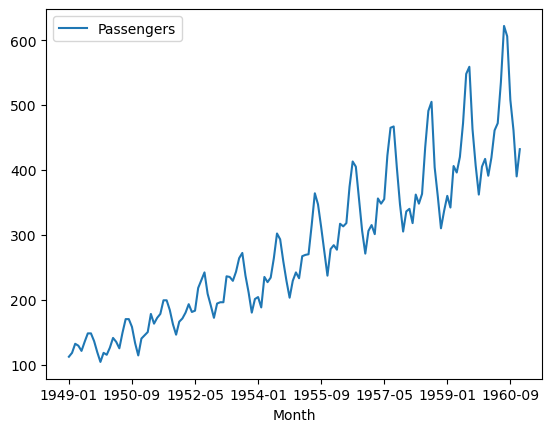

In [ ]:
# Visulize teh data
df.plot()
plt.show()

### decompose time series 

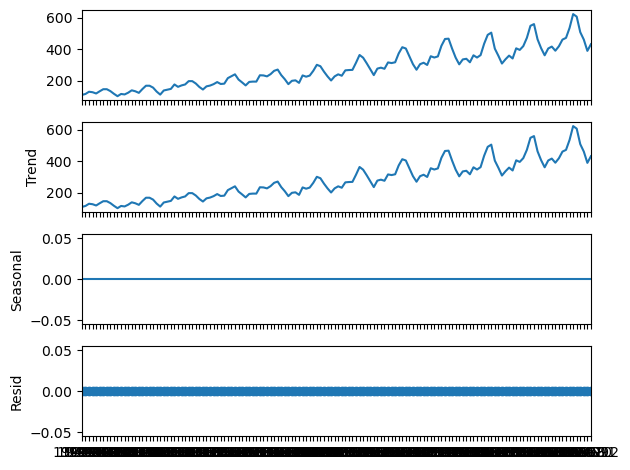

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# decompose the time series 
result = seasonal_decompose(df, model='additive', period=1)
result.plot()
plt.show()

## Checking for stationarity in a time series data

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Passengers'])
print("ADF statistics :%f" % result[0])
print("p-value: %f" % result[1])

ADF statistics :0.815369
p-value: 0.991880


In [ ]:
result

(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [ ]:
# Interpretation 
adf_statistics = result[0]

if adf_statistics < 0:
    print("The time series is stationary (reject null Hypothesis)")

else:
    print("the time seris is not stationary (Fail to reject the null hypothsis)")

the time seris is not stationary (Fail to reject the null hypothsis)


### Perform standard imports and load the dataset
For these exercises we'll be using a statsmodels built-in macroeconomics dataset:

<pre><strong>US Macroeconomic Data for 1959Q1 - 2009Q3</strong>
Number of Observations - 203
Number of Variables - 14
Variable name definitions:
    year      - 1959q1 - 2009q3
    quarter   - 1-4
    realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                seasonally adjusted annual rate)
    realcons  - Real personal consumption expenditures (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realinv   - Real gross private domestic investment (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realgovt  - Real federal consumption expenditures & gross investment
                (Bil. of chained 2005 US$, seasonally adjusted annual rate)
    realdpi   - Real private disposable income (Bil. of chained 2005
                US$, seasonally adjusted annual rate)
    cpi       - End of the quarter consumer price index for all urban
                consumers: all items (1982-84 = 100, seasonally adjusted).
    m1        - End of the quarter M1 nominal money stock (Seasonally
                adjusted)
    tbilrate  - Quarterly monthly average of the monthly 3-month
                treasury bill: secondary market rate
    unemp     - Seasonally adjusted unemployment rate (%)
    pop       - End of the quarter total population: all ages incl. armed
                forces over seas
    infl      - Inflation rate (ln(cpi_{t}/cpi_{t-1}) * 400)
    realint   - Real interest rate (tbilrate - infl)</pre>
    
<div class="alert alert-info"><strong>NOTE:</strong> Although we've provided a .csv file in the Data folder, you can also build this DataFrame with the following code:<br>
<tt>&nbsp;&nbsp;&nbsp;&nbsp;import pandas as pd<br>
&nbsp;&nbsp;&nbsp;&nbsp;import statsmodels.api as sm<br>
&nbsp;&nbsp;&nbsp;&nbsp;df = sm.datasets.macrodata.load_pandas().data<br>
&nbsp;&nbsp;&nbsp;&nbsp;df.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))<br>
&nbsp;&nbsp;&nbsp;&nbsp;print(sm.datasets.macrodata.NOTE)</tt></div>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv('../Data/macrodata.csv',index_col=0,parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


### Plot the dataset

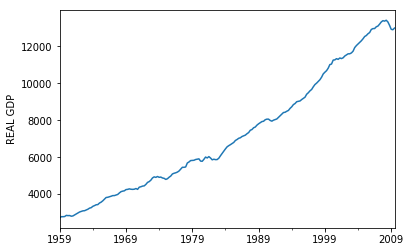

In [ ]:
ax = df['realgdp'].plot()
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='REAL GDP');

## Using Statsmodels to get the trend
<div class="alert alert-info"><h3>Related Function:</h3>
<tt><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html'><strong>statsmodels.tsa.filters.hp_filter.hpfilter</strong></a><font color=black>(X, lamb=1600)</font>&nbsp;&nbsp;Hodrick-Prescott filter</div>
    
The <a href='https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter'>Hodrick-Prescott filter</a> separates a time-series  $y_t$ into a trend component $\tau_t$ and a cyclical component $c_t$

$y_t = \tau_t + c_t$

The components are determined by minimizing the following quadratic loss function, where $\lambda$ is a smoothing parameter:

$\min_{\\{ \tau_{t}\\} }\sum_{t=1}^{T}c_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$


The $\lambda$ value above handles variations in the growth rate of the trend component.<br>When analyzing quarterly data, the default lambda value of 1600 is recommended. Use 6.25 for annual data, and 129,600 for monthly data.

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Tuple unpacking
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [ ]:
gdp_cycle

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
1960-06-30     23.040242
1960-09-30     -1.355312
1960-12-31    -67.462365
1961-03-31    -81.367438
1961-06-30    -60.167890
1961-09-30    -46.369224
1961-12-31    -20.695339
1962-03-31     -2.162153
1962-06-30     -4.718648
1962-09-30    -13.556457
1962-12-31    -44.369262
1963-03-31    -43.320274
1963-06-30    -44.546971
1963-09-30    -26.298758
1963-12-31    -44.261196
1964-03-31    -14.434412
1964-06-30    -20.266867
1964-09-30    -19.137001
1964-12-31    -54.824590
1965-03-31    -15.962445
1965-06-30    -13.740115
1965-09-30     13.254828
1965-12-31     56.030402
1966-03-31    103.074337
1966-06-30     72.175348
                 ...    
2002-06-30    -95.260035
2002-09-30   -114.798768
2002-12-31   -190.025905
2003-03-31   -221.225647
2003-06-30   -207.139428
2003-09-30    -89.685415
2003-12-31    -61.895316
2004-03-31    -56.628782
2004-06-30    -49.616781


We see from these numbers that for the period from <strong>1960-09-30</strong> to <strong>1965-06-30</strong> actual values fall below the trendline.

In [ ]:
type(gdp_cycle)

pandas.core.series.Series

In [ ]:
df['trend'] = gdp_trend

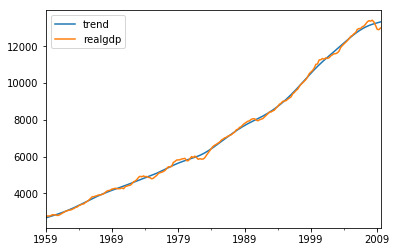

In [ ]:
df[['trend','realgdp']].plot().autoscale(axis='x',tight=True);

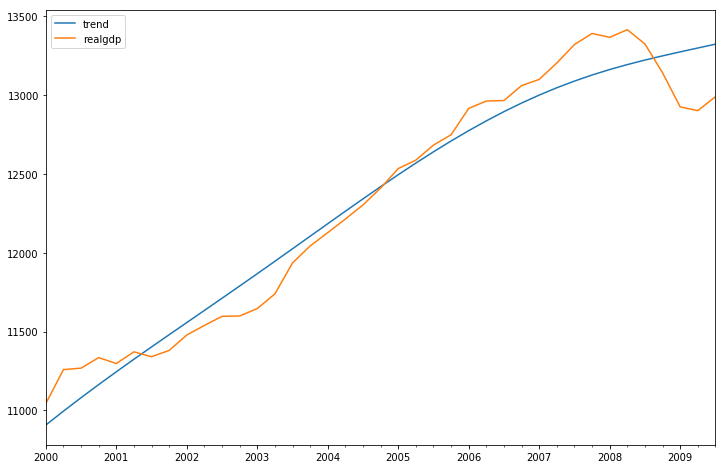

In [ ]:
df[['trend','realgdp']]['2000-03-31':].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

# Components of time Series



### 1. Trend:
- It is a longtime increase or decrease in data

### 2. Seasonality 
- Regular patterns repeating over time (yearly, Monthly, weekly, quaterly...)

### 3. Cyclic
- Long-term fluctions that are not of fixed period

### 4. Iregular/Noise/Residuals
- Random variations that are not explained by trend, seasonality, cyclic components

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0, index_col=0)
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


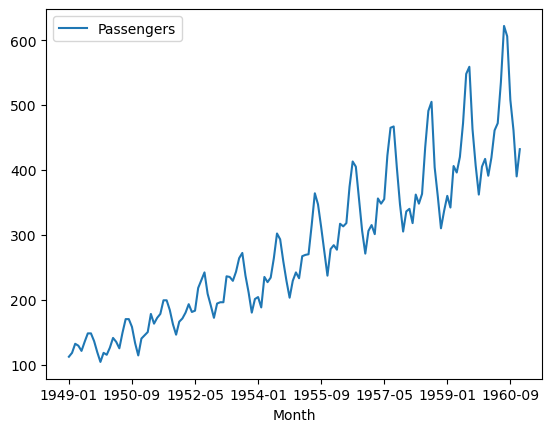

In [ ]:
# Visulize teh data
df.plot()
plt.show()

### decompose time series 

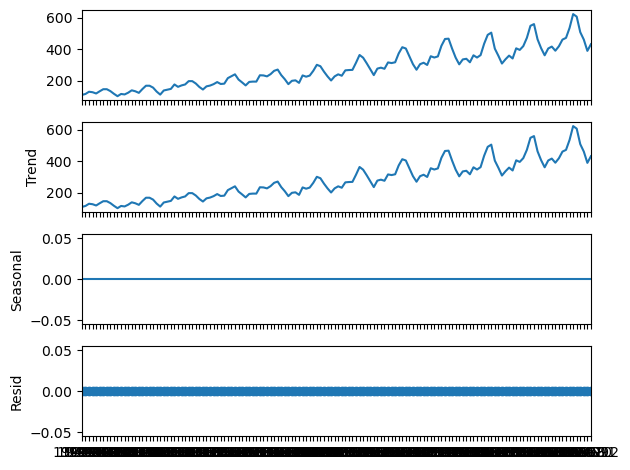

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# decompose the time series 
result = seasonal_decompose(df, model='additive', period=1)
result.plot()
plt.show()

## Checking for stationarity in a time series data

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Passengers'])
print("ADF statistics :%f" % result[0])
print("p-value: %f" % result[1])

ADF statistics :0.815369
p-value: 0.991880


In [ ]:
result

(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [ ]:
# Interpretation 
adf_statistics = result[0]

if adf_statistics < 0:
    print("The time series is stationary (reject null Hypothesis)")

else:
    print("the time seris is not stationary (Fail to reject the null hypothsis)")

the time seris is not stationary (Fail to reject the null hypothsis)


# ETS

## Error/Trend/Seasonality Models
As we begin working with <em>endogenous</em> data ("endog" for short) and start to develop forecasting models, it helps to identify and isolate factors working within the system that influence behavior. Here the name "endogenous" considers internal factors, while "exogenous" would relate to external forces. These fall under the category of <em>state space models</em>, and include <em>decomposition</em> (described below), and <em>exponential smoothing</em> (described in an upcoming section).

The <a href='https://en.wikipedia.org/wiki/Decomposition_of_time_series'>decomposition</a> of a time series attempts to isolate individual components such as <em>error</em>, <em>trend</em>, and <em>seasonality</em> (ETS). We've already seen a simplistic example of this in the <strong>Introduction to Statsmodels</strong> section with the Hodrick-Prescott filter. There we separated data into a trendline and a cyclical feature that mapped observed data back to the trend.

<div class="alert alert-info"><h3>Related Function:</h3>
<tt><strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html'>statsmodels.tsa.seasonal.seasonal_decompose</a></strong><font color=black>(x, model)</font>&nbsp;&nbsp;
Seasonal decomposition using moving averages</tt>
<h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/ets.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Innovations state space models for exponential smoothing</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Decomposition_of_time_series'>Wikipedia</a></strong>&nbsp;&nbsp;<font color=black>Decomposition of time series</font></div>

## Seasonal Decomposition
Statsmodels provides a <em>seasonal decomposition</em> tool we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.


We apply an <strong>additive</strong> model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers).<br>
A <strong>multiplicative</strong> model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

For these examples we'll use the International Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
airline = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [ ]:
airline.dropna(inplace=True)

In [ ]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


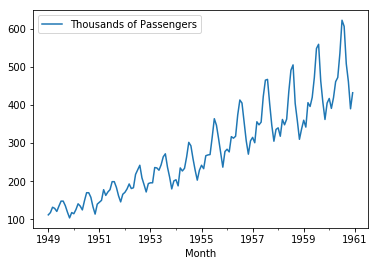

In [ ]:
airline.plot();

Based on this chart, it looks like the trend in the earlier days is increasing at a higher rate than just linear (although it is a  bit hard to tell from this one plot).

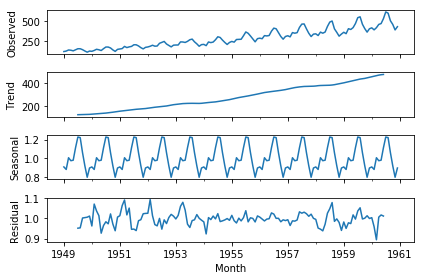

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')  # model='mul' also works
result.plot();

Great! In the next section we'll see how to apply exponential smoothing models to each of these contributing factors.

# MA
## Moving Averages
In this section we'll compare <em>Simple Moving Averages</em> to <em>Exponentially Weighted Moving Averages</em> in terms of complexity and performance.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong><a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html'>pandas.DataFrame.rolling</a></strong><font color=black>(window)</font>&nbsp;&nbsp;
Provides rolling window calculations<br>
<strong><a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html'>pandas.DataFrame.ewm</a></strong><font color=black>(span)</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Provides exponential weighted functions</tt></div></div>

### Perform standard imports and load the dataset
For these examples we'll use the International Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
airline = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [ ]:
airline.dropna(inplace=True)

In [ ]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


___
# SMA
## Simple Moving Average

We've already shown how to create a <a href='https://en.wikipedia.org/wiki/Moving_average#Simple_moving_average'>simple moving average</a> by applying a <tt>mean</tt> function to a rolling window.

For a quick review:

In [ ]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [ ]:
airline.head(15)

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


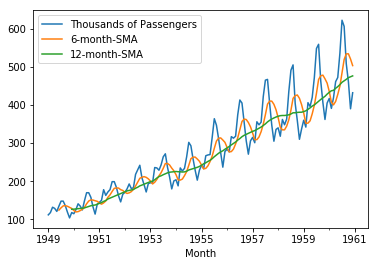

In [ ]:
airline.plot();

___
# EWMA
## Exponentially Weighted Moving Average 

We just showed how to calculate the SMA based on some window. However, basic SMA has some weaknesses:
* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behavior, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly

To help fix some of these issues, we can use an <a href='https://en.wikipedia.org/wiki/Exponential_smoothing'>EWMA (Exponentially weighted moving average)</a>.

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.
[Full details on Mathematics behind this can be found here](http://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows).
Here is the shorter version of the explanation behind EWMA.

The formula for EWMA is:
### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

Where $x_t$ is the input value, $w_i$ is the applied weight (Note how it can change from $i=0$ to $t$), and $y_t$ is the output.

Now the question is, how to we define the weight term $w_i$?

This depends on the <tt>adjust</tt> parameter you provide to the <tt>.ewm()</tt> method.

When <tt>adjust=True</tt> (default) is used, weighted averages are calculated using weights equal to $w_i = (1 - \alpha)^i$

which gives
### begin
### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

When <tt>adjust=False</tt> is specified, moving averages are calculated as:

### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

which is equivalent to using weights:

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t.
\end{cases}\end{split}

When <tt>adjust=True</tt> we have $y_0=x_0$ and from the last representation above we have 
$y_t=\alpha x_t+(1−α)y_{t−1}$, therefore there is an assumption that $x_0$ is not an ordinary value but rather an exponentially weighted moment of the infinite series up to that point.

For the smoothing factor $\alpha$ one must have $0<\alpha≤1$, and while it is possible to pass <em>alpha</em> directly, it’s often easier to think about either the <em>span</em>, <em>center of mass</em> (com) or <em>half-life</em> of an EW moment:

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}

* <strong>Span</strong> corresponds to what is commonly called an “N-day EW moving average”.
* <strong>Center of mass</strong> has a more physical interpretation and can be thought of in terms of span: $c=(s−1)/2$
* <strong>Half-life</strong> is the period of time for the exponential weight to reduce to one half.
* <strong>Alpha</strong> specifies the smoothing factor directly.

We have to pass precisely one of the above into the <tt>.ewm()</tt> function. For our data we'll use <tt>span=12</tt>.

In [ ]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()

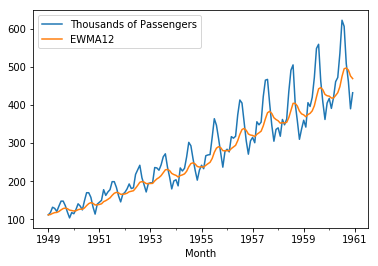

In [ ]:
airline[['Thousands of Passengers','EWMA12']].plot();

## Comparing SMA to EWMA

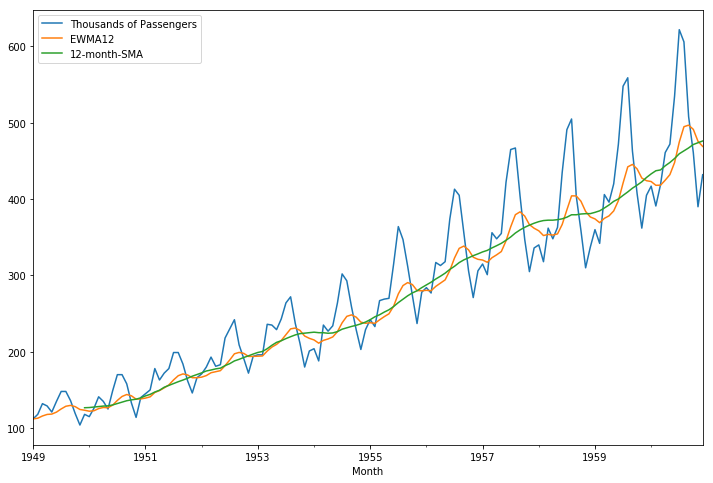

In [ ]:
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

## Simple Exponential Smoothing
The above example employed <em>Simple Exponential Smoothing</em> with one smoothing factor <strong>α</strong>. Unfortunately, this technique does a poor job of forecasting when there is a trend in the data as seen above. In the next section we'll look at <em>Double</em> and <em>Triple Exponential Smoothing</em> with the Holt-Winters Methods.

# Holt-Winters Methods
In the previous section on <strong>Exponentially Weighted Moving Averages</strong> (EWMA) we applied <em>Simple Exponential Smoothing</em> using just one smoothing factor $\alpha$ (alpha). This failed to account for other contributing factors like trend and seasonality.

In this section we'll look at <em>Double</em> and <em>Triple Exponential Smoothing</em> with the <a href='https://otexts.com/fpp2/holt-winters.html'>Holt-Winters Methods</a>. 

In <strong>Double Exponential Smoothing</strong> (aka Holt's Method) we introduce a new smoothing factor $\beta$ (beta) that addresses trend:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
y_t &= l_t + b_t & \text{    fitted model}\\
\hat y_{t+h} &= l_t + hb_t & \text{    forecasting model (} h = \text{# periods into the future)}\end{split}

Because we haven't yet considered seasonal fluctuations, the forecasting model is simply a straight sloped line extending from the most recent data point. We'll see an example of this in upcoming lectures.

With <strong>Triple Exponential Smoothing</strong> (aka the Holt-Winters Method) we introduce a smoothing factor $\gamma$ (gamma) that addresses seasonality:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    seasonal}\\
y_t &= (l_t + b_t) c_t & \text{    fitted model}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    forecasting model (} m = \text{# periods into the future)}\end{split}

Here $L$ represents the number of divisions per cycle. In our case looking at monthly data that displays a repeating pattern each year, we would use $L=12$.

In general, higher values for $\alpha$, $\beta$ and $\gamma$ (values closer to 1), place more emphasis on recent data.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html'>statsmodels.tsa.holtwinters.SimpleExpSmoothing</a></strong><font color=black>(endog)</font>&nbsp;&nbsp;&nbsp;&nbsp;
Simple Exponential Smoothing<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html'>statsmodels.tsa.holtwinters.ExponentialSmoothing</a></strong><font color=black>(endog)</font>&nbsp;&nbsp;
    Holt-Winters Exponential Smoothing</tt>
    
<h3>For Further Reading:</h3>
<tt>
<strong>
<a href='https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc43.htm'>NIST/SEMATECH e-Handbook of Statistical Methods</a></strong>&nbsp;&nbsp;<font color=black>What is Exponential Smoothing?</font></tt></div>

### Perform standard imports and load the dataset
For these examples we'll continue to use the International Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

### Setting a DatetimeIndex Frequency
Note that our DatetimeIndex does not have a frequency. In order to build a Holt-Winters smoothing model, statsmodels needs to know the frequency of the data (whether it's daily, monthly etc.). Since observations occur at the start of each month, we'll use MS.<br>A full list of time series offset aliases can be found <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.

In [ ]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [ ]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


___
## Simple Exponential Smoothing

A variation of the statmodels Holt-Winters function provides Simple Exponential Smoothing. We'll show that it performs the same calculation of the weighted moving average as the pandas <tt>.ewm()</tt> method:<br>
$\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
df['SES12']=SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


<div class="alert alert-danger"><strong>NOTE:</strong> For some reason, when <tt>optimized=False</tt> is passed into <tt>.fit()</tt>, the statsmodels <tt>SimpleExpSmoothing</tt> function shifts fitted values down one row. We fix this by adding <tt>.shift(-1)</tt> after <tt>.fittedvalues</tt></div>

___
## Double Exponential Smoothing
Where Simple Exponential Smoothing employs just one smoothing factor $\alpha$ (alpha), Double Exponential Smoothing adds a second smoothing factor $\beta$ (beta) that addresses trends in the data. Like the alpha factor, values for the beta factor fall between zero and one ($0<\beta≤1$). The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.

We can also address different types of change (growth/decay) in the trend. If a time series displays a straight-line sloped trend, you would use an <strong>additive</strong> adjustment. If the time series displays an exponential (curved) trend, you would use a <strong>multiplicative</strong> adjustment.

As we move toward forecasting, it's worth noting that both additive and multiplicative adjustments may become exaggerated over time, and require <em>damping</em> that reduces the size of the trend over future periods until it reaches a flat line.

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.336774
1949-02-01,118,112.923077,112.923077,120.336774
1949-03-01,132,115.857988,115.857988,134.336774
1949-04-01,129,117.879836,117.879836,131.336774
1949-05-01,121,118.359861,118.359861,123.336774


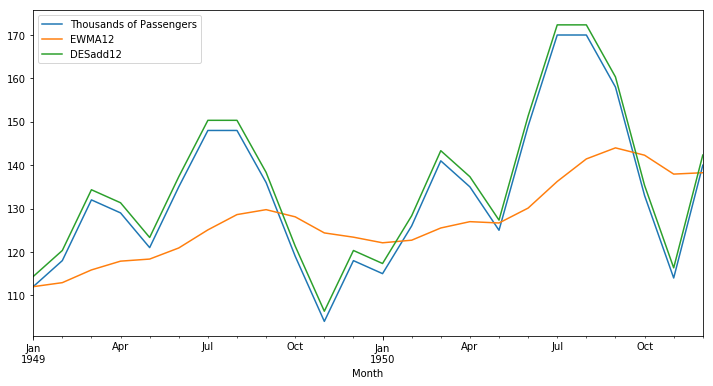

In [ ]:
df[['Thousands of Passengers','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Here we can see that Double Exponential Smoothing is a much better representation of the time series data.<br>
Let's see if using a multiplicative seasonal adjustment helps.

In [ ]:
df['DESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.336774,112.049247
1949-02-01,118,112.923077,112.923077,120.336774,118.051885
1949-03-01,132,115.857988,115.857988,134.336774,132.058041
1949-04-01,129,117.879836,117.879836,131.336774,129.056722
1949-05-01,121,118.359861,118.359861,123.336774,121.053204


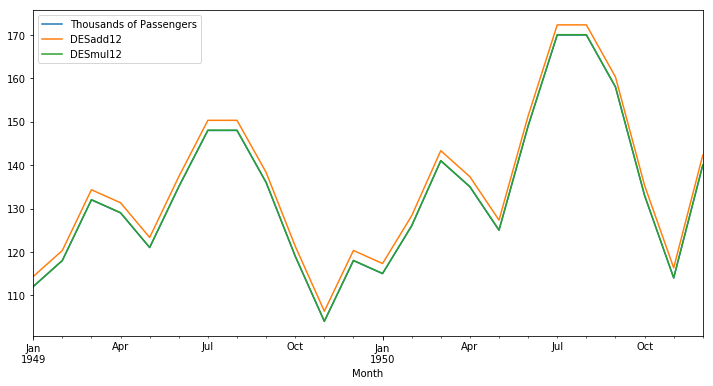

In [ ]:
df[['Thousands of Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Although minor, it does appear that a multiplicative adjustment gives better results. Note that the green line almost completely overlaps the original data.

___
## Triple Exponential Smoothing
Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data. 



In [ ]:
df['TESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.336774,112.049247,113.081280
1949-02-01,118,112.923077,112.923077,120.336774,118.051885,120.550730
1949-03-01,132,115.857988,115.857988,134.336774,132.058041,135.527373
1949-04-01,129,117.879836,117.879836,131.336774,129.056722,133.155127
1949-05-01,121,118.359861,118.359861,123.336774,121.053204,125.656203


In [ ]:
df['TESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,
1949-01-01,112,112.000000,112.000000,114.336774,112.049247,113.081280,111.753654
1949-02-01,118,112.923077,112.923077,120.336774,118.051885,120.550730,118.993207
1949-03-01,132,115.857988,115.857988,134.336774,132.058041,135.527373,133.458671
1949-04-01,129,117.879836,117.879836,131.336774,129.056722,133.155127,127.957617
1949-05-01,121,118.359861,118.359861,123.336774,121.053204,125.656203,121.027379


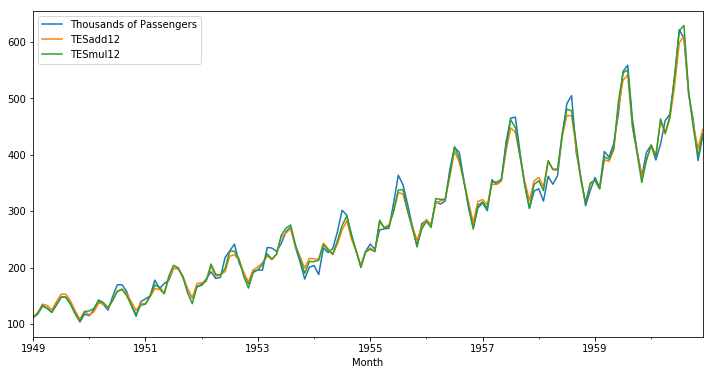

In [ ]:
df[['Thousands of Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

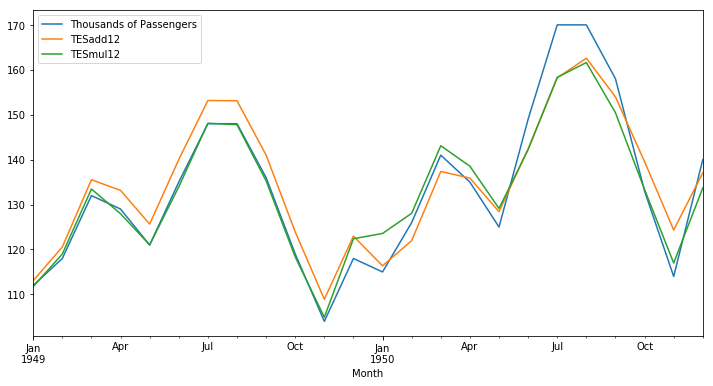

In [ ]:
df[['Thousands of Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Based on the plot above, you might think that Triple Exponential Smoothing does a poorer job of fitting than Double Exponential Smoothing. The key here is to consider what comes next - <em>forecasting</em>. We'll see that having the ability to predict fluctuating seasonal patterns greatly improves our forecast.

But first, we'll work out some time series exercises before moving on to forecasting.